1. Скачать файл по ссылке https://cloud.mail.ru/public/5EMp/5ePzqmXAp - там находятся csv-файлы для выполнения задания.
2. Импортировать датасет из файла 'restaurants.csv' и присвоить его переменной (например, переменной df).


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('files/restaurants.csv', sep = ',')

3. Вывести первые 10 строк датафрейма. Изучить структуру таблицы.

Таблица состоит из 7 колонок: 
- vendor_id (уникальный идентификатор ресторана), 
- chain_id (уникальный идентификатор сети, в которую входит ресторан), 
- city_name (город), 
- specialisation(специализация ресторана), 
- successful_orders(кол-во успешных заказов), 
- fail_orders(кол-во не успешных заказов), 
- reorders (перезаказы).

In [2]:
df.head(10)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0
5,37650,27579,Архангельск,Суши,3.0,0.0,0.0
6,37127,27250,Астрахань,Суши,55.0,5.0,6.0
7,28476,20266,Астрахань,Суши,342.0,13.0,14.0
8,28478,20266,Астрахань,Суши,194.0,1.0,7.0
9,34127,25077,Астрахань,Пицца,136.0,4.0,1.0


### Сколько в датафрейме колонок с типом float64?

In [3]:
np.sum(df.dtypes == 'float64')

3

### Сколько наблюдений в датафрейме?

In [4]:
df.shape[0]

784

### Сколько колонок в датафрейме?

In [5]:
df.shape[1]

7

### Сколько уникальных городов в датафрейме?

In [6]:
#print(type(df.city_name))
df.city_name.nunique()

63

### Кол-во ресторанов специализации "Рыба"?

In [7]:
filter = (df.specialisation == "Рыба")
np.sum(filter)  #626 µs ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) 
#df[filter].shape[0] # 1.26 ms ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

30

### Получить в общем среднее кол-во успешных заказов (ответ округлить до целого).

In [8]:
# df.describe() # 115
round(df.successful_orders.mean())

115

### Город с самым маленьким количеством ресторанов.

In [9]:
df.city_name.value_counts().tail(1)

Ханты-Мансийск    2
Name: city_name, dtype: int64

### Сколько ресторанов имеют более 20 неуспешных заказов?

In [10]:
filter = (df.fail_orders > 20)
np.sum(filter)

10

### Сколько ресторанов имеют более 20 неуспешных заказов и менее 500 успешных заказов? 

In [11]:
filter = [(df.fail_orders > 20) & (df.successful_orders < 500)]
np.sum(filter)

5

### Среднее кол-во успешных заказов в ресторанах со специализацией "Выпечка" (ответ округлить до целого).

In [12]:
ans = df.successful_orders[(df.specialisation == "Выпечка")].mean()
round(ans)

13

### Какая специализация имеют самую высокую долю неуспешных заказов (все заказы по конкретному ресторану складываются из успешных, неуспешных заказов и перезаказов)?

In [13]:
(df.groupby(by ='specialisation')['fail_orders'].mean()/(df.groupby(by ='specialisation')['successful_orders'].mean()+df.groupby(by ='specialisation')['fail_orders'].mean()+df.groupby(by ='specialisation')['reorders'].mean())).nlargest(1)

specialisation
Вегетарианское меню    0.304348
dtype: float64

### Максимальное количество успешных заказов в ресторане для специализации "Бургеры". 

In [14]:
max(df.successful_orders[(df.specialisation == "Бургеры")])

506.0

### Рассчитать среднее кол-во успешных заказов по специализации "Суши" в городе Белгород (ответ округлить до целого). 

In [15]:
filters = (df.specialisation == "Суши") & (df.city_name == "Белгород")
df.successful_orders[filters].mean()

328.0

In [16]:
df.head(3)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0


Импортировать таблицу "restaurant_scores.csv". В исходную таблицу добавить новый столбец "model_score" из таблицы "restaurant_scores", соединив таблицы по логически подходящему столбцу (id и vendor_id).

In [17]:
df2 = pd.read_csv('files/restaurant_scores.csv', sep = ',')
df2.head(3) #37722 rows × 2 columns

,id,model_score
0,1,0.622864
1,2,0.331360
2,3,0.450092


In [18]:
res = pd.merge(df, df2, left_on='vendor_id', right_on='id')
res.head(5)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders,id,model_score
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0,28957,0.421871
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0,37381,0.386503
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0,28703,0.664808
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0,37382,0.838883
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0,36877,0.176469


### Какой средний model_score для chain_id 27399 (ответ округлить до 2 знаков после запятой). 

In [19]:
answer = res.model_score[(res.chain_id == 27399)].mean()
round(answer, 2)

0.61

In [20]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

Получить следующую визуализацию:

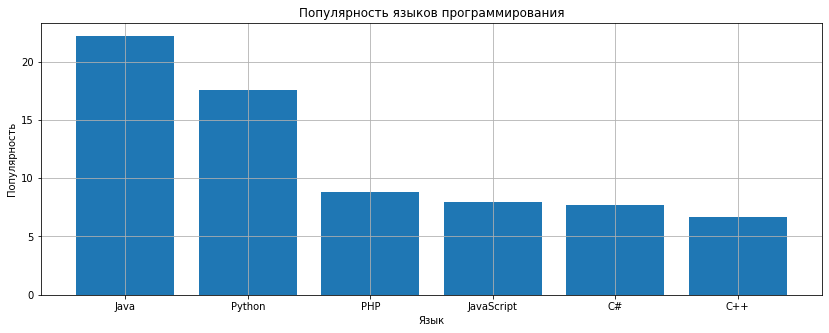

In [21]:
#Корректное отображение графиков прямо в jupyter'e
%matplotlib inline
#Все функции matplotlib API, в частности plot и close, находятся в модуле matplotlib.pyplot
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(14, 5))
ax1 = fig1.add_subplot()
ax1.set_title('Популярность языков программирования')
ax1.set_xlabel('Язык')
ax1.set_ylabel('Популярность')
ax1.bar(x, popularity)
ax1.grid()

In [22]:
partizan = pd.read_excel('files/partizan.xlsx')
partizan.tail()

,Unnamed: 0,chain_name,lon,lat,orders
30,30,Zvjezda,37.718238,55.794452,4
31,31,Amazonija,37.748619,55.791744,5
32,32,Spasibo,37.728523,55.818736,0
33,33,Gurman_msk,37.734201,55.783089,0
34,34,Super_Papas,37.751179,55.780795,0


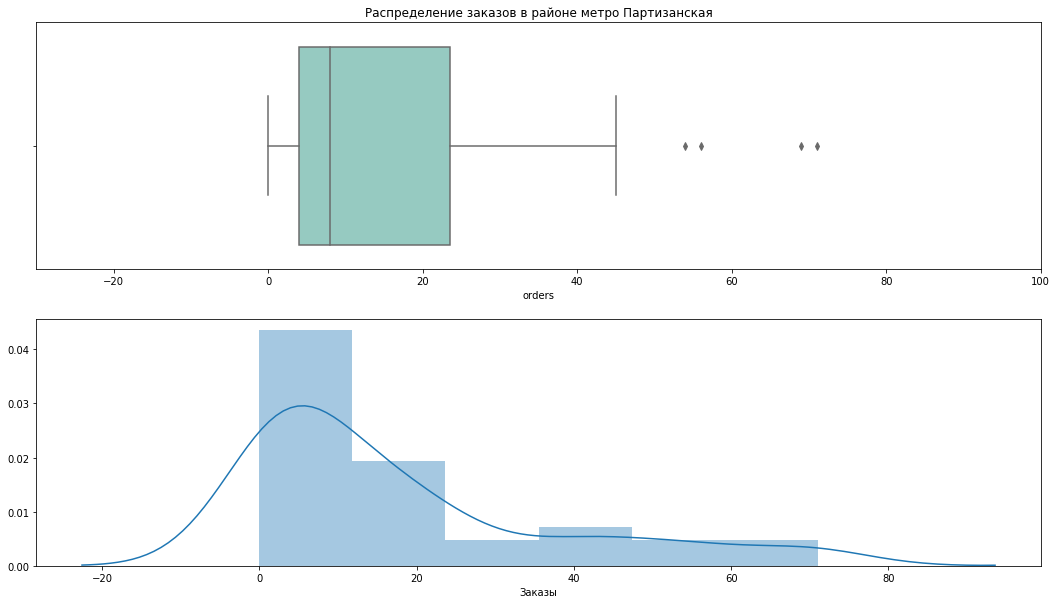

In [23]:
import seaborn as sns

f1 = plt.figure(figsize=(18, 10))
ax1 = f1.add_subplot(211)
ax1.set_title('Распределение заказов в районе метро Партизанская')
plt.xlim([-30,100])
sns.boxplot(x = "orders", data=partizan[partizan.orders.isin(np.arange(0,75, 1))], palette="Set3")
ax2 = f1.add_subplot(212)
sns.distplot(partizan['orders'].dropna(), axlabel="Заказы")